## Open CV Basics

This notebook is adapted from tutorial by Dr. Adrain Rosebrock. 

Link: https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/


In [1]:
import inspect
from matplotlib import pyplot as plt
import imutils
import cv2

In [2]:
def image_stats(image):
    return image.shape

#For displaying in Jupyter Notebook we use matplotlib
def display_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

Load the input image and show its dimensions, keeping in mind that 
images are represented as a multi-dimensional NumPy array with 
shape num of rows (height) x num of columns (width) x num of channels (depth)

In [3]:
image = cv2.imread("./images/jp.jpeg")
(h,w,d) = image_stats(image)
print("width={}, height={}, depth={}".format(w, h, d))

width=318, height=159, depth=3


Display the image to our screen -- we will need to click the window open by OpenCV and press a key on our keyboard to continue execution.

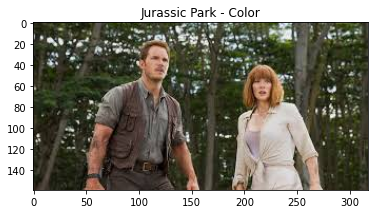

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
display_image(image, 'Jurassic Park - Color')

## Pixels and Colors in Images
All images consists of pixels which are the raw building blocks of images. Images are made of pixels in a grid. A 640 x 480 image has 640 columns (the width) and 480 rows (the height). There are `640 x 480 = 307200` pixels in an image with those dimensions.

Each pixel ina grayscale image has a value representing the shade of gray. In OpenCV, there are 256 shades of gray = from 0 to 255. Soa grayscale image would have a grayscale value associated with each pixel.

Pixels in a color image have additional information. There are several color spaces that we will eventually see as we progress with various image manipulation techniques. For simplicity let's consider RGB color space. 

In OpenCV color images in the RGB (Red, Green, Blue) color space have a 3-tuple associated with each pixel: `(B, G, R)`, this is legacy ordering of RGB format when OpenCV was first developed. each value in BGR 3-tuple has a range `[0, 255]`. There are `256 * 256 *  256 = 16777216` color possibilities. 

Let's try to retriveve the value of a pixel in the image.  

In [5]:
# Access the RGB pixel located at x=50, y=100, Recall OpenCV stores the images in BGR order rather than RGB
(B, G, R) = image[100, 50]
print("R={}, B={}, G={}".format(R, B, G))

R=9, B=23, G=21


## Array Slicing and Cropping

Extracting "regions of interest" (ROIs) is an important skill for image processing. 

To manually extract an ROI, we use array slicing.


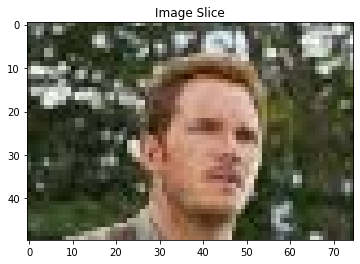

In [6]:
# extract a 100x100 pixel square ROI (Region of Interest) from the input image starting at x=75,y=10 and ending at x=150,y=60
roi = image[10:60, 75:150]
display_image(roi, 'Image Slice')

## Resizing Images

Resizing is important for several reasons, you might want to fit the image on screen, image processing on smaller images is faster etc. In case of deep learning, we often resize the images, ignoring the aspect ratios, so that the volume fitsinto a network which requirs that an image be square and of certain dimension.

Let's try to resize our image to 200 x 200 pixel.

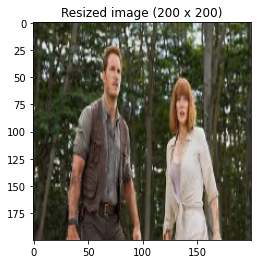

In [7]:
#resize the image to 200 x 200 px, ignoring the aspect ratio.
resized = cv2.resize(image, (200, 200))
display_image(resized, 'Resized image (200 x 200)')

**Resizing images with aspect ratio.**

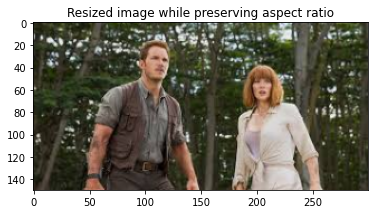

In [8]:
# fixed resizing and distort aspect ratio so let's resize the width 
# to be 300 px and compute the new height based on the aspect ratio

r = 300.0 / w
dim = (300, int(h*r))
resized = cv2.resize(image, dim)
display_image(resized, "Resized image while preserving aspect ratio")

Computing aspect ratio each time is tedious, we can use `imutils.resize` function.

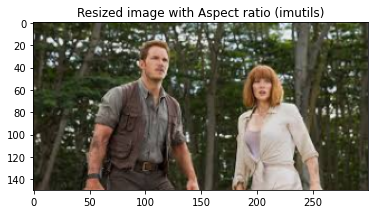

In [10]:
# manually computing aspect ratio can be a pain
# use imutils instead
resized = imutils.resize(image, width=300)
display_image(resized, "Resized image with Aspect ratio (imutils)")

## Rotating an image

Let's rotate the an image 45 degrees clockwise using OpenCV by: 
* first computing the image center
* constructing the rotation matrix
* finally, applying affine wrap 

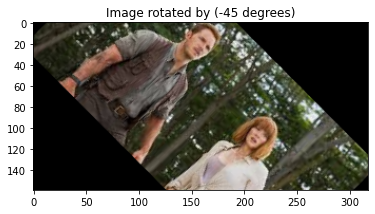

In [9]:
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
display_image(rotated, "Image rotated by (-45 degrees)")

Let's now use `imutils` to rotate the same image.

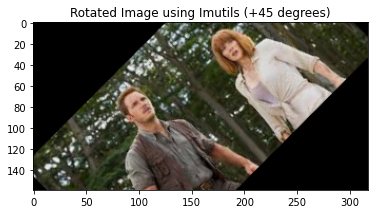

In [11]:
rotated_im = imutils.rotate(image, 45)
display_image(rotated_im, "Rotated Image using Imutils (+45 degrees)")

In the above, case the image is clipped and out of view. In order to avoid this use `imutils.rotate_bound` function.

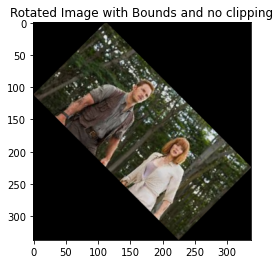

In [12]:
rotated_with_bounds_im = imutils.rotate_bound(image, 45)
display_image(rotated_with_bounds_im, "Rotated Image with Bounds and no clipping")

## Smoothing an image

In order to reduce high-frequency noise from an image, to make it easier for our algorithms to detect and understand the actual content of the image, we need ot blur or smoothen the image.

Applying a Gaussian Blur with a 11x11 kernel to the image to smooth it. Useful to reduce high-frequency noise.


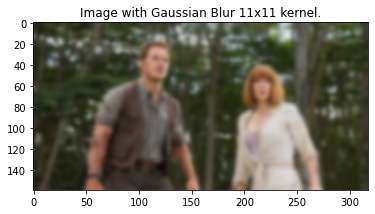

In [13]:
blurred = cv2.GaussianBlur(image, (11, 11), 0)
display_image(blurred, "Image with Gaussian Blur 11x11 kernel.")